<center> 
    <h1> Toronto Crime </h1>
<h3> Sprint 3</h3>
<h3> Basic Random Forest</h3>
    </center>

##### Author: Arsalan Arif Radhu
##### Date: 23 November 2023

### Table of Contents:
- [Introduction](#intro) <br />
- [Random Forest](#rf)<br />

### Introduction <a id="intro" /> 

In [11]:
# Import necessary libraries
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, classification_report
from sklearn.ensemble import RandomForestClassifier
from matplotlib import pyplot as plt


In [2]:
# Importing the data
df = pd.read_csv('../Data/FinalDataAdvAn.csv',index_col=0)
df.reset_index(inplace=True)

In [3]:
df.shape

(414327, 39)

Dropping the `UCR_CODE` and `UCR_EXT` as I just realized that these indicate which crime type has occurred. Hence, I will be dropping them.

In [4]:
df = df.drop('UCR_CODE', axis=1)
df = df.drop('UCR_EXT', axis=1)

In [5]:
df.columns

Index(['OBJECTID', 'CRIME_TYPE', 'REPORT_YEAR', 'REPORT_MONTH', 'REPORT_DAY',
       'OCC_YEAR', 'OCC_MONTH', 'OCC_DAY', 'LONG_WGS84', 'LAT_WGS84', 'DEATH',
       'INJURIES', 'D11', 'D12', 'D13', 'D14', 'D22', 'D23', 'D31', 'D32',
       'D33', 'D41', 'D42', 'D43', 'D51', 'D52', 'D53', 'D55', 'NSA',
       'Apartment', 'Commercial', 'Educational', 'House', 'NotApplicable',
       'Other', 'Outside', 'Transit'],
      dtype='object')

In [6]:
df.sample(10)

,OBJECTID,CRIME_TYPE,REPORT_YEAR,REPORT_MONTH,REPORT_DAY,OCC_YEAR,OCC_MONTH,OCC_DAY,LONG_WGS84,LAT_WGS84,...,D55,NSA,Apartment,Commercial,Educational,House,NotApplicable,Other,Outside,Transit
120718,132226,0,2020,12,26,2020,12,26,-79.390429,43.679140,...,0,0,0,1,0,0,0,0,0,0
294872,64608,5,2021,1,25,2021,1,22,-79.316029,43.793869,...,0,0,0,0,0,0,0,0,1,0
397855,45995,1,2020,4,12,2020,4,12,-79.442600,43.658794,...,0,0,0,1,0,0,0,0,0,0
204080,3880,5,2015,5,27,2015,5,25,-79.369685,43.652783,...,0,0,0,0,0,0,0,0,1,0
402004,50148,1,2020,12,4,2020,12,3,-79.509030,43.625386,...,0,0,0,1,0,0,0,0,0,0
88900,97382,0,2019,3,27,2019,3,27,-79.374451,43.660196,...,0,0,0,0,0,0,0,1,0,0
296754,66491,5,2021,5,3,2021,5,3,-79.307332,43.686931,...,1,0,0,0,0,0,0,0,1,0
290595,60329,5,2020,8,17,2020,8,17,-79.301084,43.803736,...,0,0,0,0,0,0,0,0,1,0
392717,40846,1,2019,9,3,2019,9,3,-79.467709,43.736125,...,0,0,0,0,0,1,0,0,0,0
99004,108450,0,2019,9,21,2019,9,20,-79.585314,43.743897,...,0,0,0,1,0,0,0,0,0,0


## Random Forest <a id="rf" /> 

I chose a Random Forest model as it offers a comprehensive and adaptable solution tailored to the specific complexities of my project. From its capacity to handle diverse tasks to its resilience in the face of imperfect data, the decision reflects a strategic alignment with a model that not only meets the immediate needs of the project but also promises versatility and reliability in extracting meaningful insights from complex datasets.

In [9]:
# Extract features and labels
X_rf = df.drop('CRIME_TYPE', axis=1)  # Replace 'label_column' with the actual label column name
y_rf = df['CRIME_TYPE']

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X_rf, y_rf, test_size=0.3, random_state=62)

# Create a Random Forest classifier
random_forest = RandomForestClassifier(n_estimators=100, random_state=42)

# Train the classifier on the training data
random_forest.fit(X_train, y_train)

# Make predictions on the test set
y_pred = random_forest.predict(X_test)

# Evaluate the model
accuracy = accuracy_score(y_test, y_pred)
classification_rep = classification_report(y_test, y_pred)

print("Accuracy:", accuracy)
print("Classification Report:\n", classification_rep)


Accuracy: 0.9645290790754552
Classification Report:
               precision    recall  f1-score   support

           0       0.99      1.00      0.99     47734
           1       0.97      0.97      0.97     18739
           2       0.97      0.98      0.97       338
           3       0.90      0.70      0.79      7833
           4       1.00      0.99      0.99      1655
           5       0.94      0.97      0.96     48000

    accuracy                           0.96    124299
   macro avg       0.96      0.94      0.95    124299
weighted avg       0.96      0.96      0.96    124299



In [10]:
# Get feature importances
feature_importances = random_forest.feature_importances_

# Pair feature names with their importance s}cores
feature_importance_dict = dict(zip(X_rf.columns, feature_importances))

# Print or plot feature importances
print(feature_importance_dict)

{'OBJECTID': 0.517052406527604, 'REPORT_YEAR': 0.0746927346836039, 'REPORT_MONTH': 0.02596185735476011, 'REPORT_DAY': 0.03106721871674793, 'OCC_YEAR': 0.06385921410881006, 'OCC_MONTH': 0.024515827261220053, 'OCC_DAY': 0.03091745757141171, 'LONG_WGS84': 0.047225159513038066, 'LAT_WGS84': 0.04562762751604902, 'DEATH': 0.0008913395152478706, 'INJURIES': 0.003951460651090135, 'D11': 0.0009284177449655753, 'D12': 0.0010667980356654924, 'D13': 0.0009319716449758916, 'D14': 0.0013370229814990387, 'D22': 0.0011349795682945546, 'D23': 0.0014723837592778542, 'D31': 0.0012783727848657517, 'D32': 0.0014181718694412243, 'D33': 0.0010834126666909747, 'D41': 0.0012653409761071775, 'D42': 0.0009979718270407014, 'D43': 0.0011763505237277843, 'D51': 0.0014742163032736477, 'D52': 0.0016003190679690384, 'D53': 0.0013524337446330103, 'D55': 0.0012988780384089959, 'NSA': 0.0007632023881811789, 'Apartment': 0.019524196066845814, 'Commercial': 0.014701694726903749, 'Educational': 0.0021460516828678312, 'House

Creating a visual for easy readability.

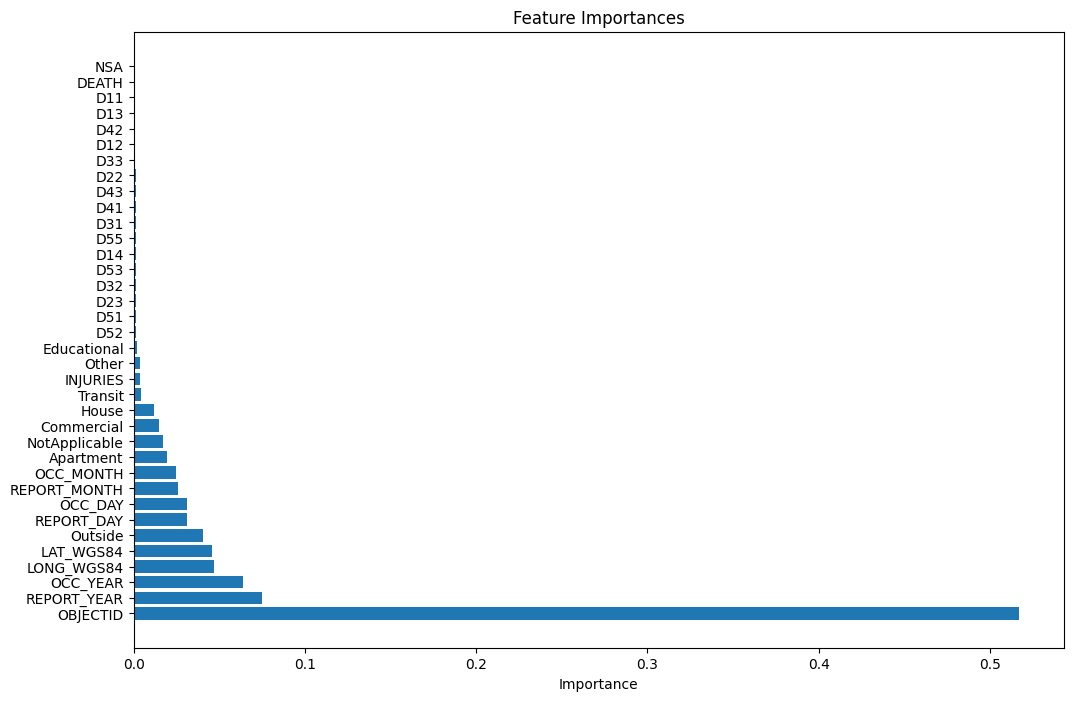

In [12]:
importance_df = pd.DataFrame(list(feature_importance_dict.items()), columns=['Feature', 'Importance'])

# Sort the DataFrame by Importance
importance_df = importance_df.sort_values(by='Importance', ascending=False)

# Plot the feature importances
plt.figure(figsize=(12, 8))
plt.barh(importance_df['Feature'], importance_df['Importance'])
plt.xlabel('Importance')
plt.title('Feature Importances')
plt.show()

Everything looks alright but I am not I don't think `OBJECTID` is a feature I wished to have in my data set.  

After looking into it more, I found out that due to the way I had concatenated my data set, it created a very predictable patern with the `OBJECTID` which I was unaware of. I will be dropping the column and then rerun the models. Another thing I realized that I had not randomize my data set, which I will be doing going forward.